# Центральная предельная теорема своими руками на примере
## Экспоненциальное распределение

The probability density function for expon is:
                f(x) = exp(-x)
for x >= 0.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, expon.pdf(x, loc, scale) is identically equivalent to expon.pdf(y) / scale with y = (x - loc) / scale.

A common parameterization for expon is in terms of the rate parameter lambda, such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

Генерация выборки объёмом 1000

In [72]:
scale = 2
exp_rv = sts.expon(scale=scale)

exp_sample = exp_rv.rvs(1000)

print('Мат. ожидание: ', exp_rv.mean())
print('Среднее квадратическое отклонение: ', exp_rv.std())

Мат. ожидание:  2.0
Среднее квадратическое отклонение:  2.0


Построим гистограму и график плотности распределения с.в. для этой выборки

E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'pdf')

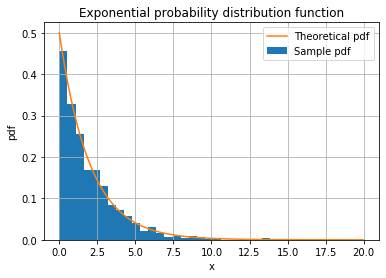

In [73]:
plt.hist(exp_sample, bins=30, normed=True, label='Sample pdf')

x = np.linspace(0,20,1000)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()

plt.title('Exponential probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

Сгенерируем для каждого значения n - объёма выборки (5, 10, 30, 50) 1000 выборок объёма n.

In [74]:
sampleNum = 1000

sampleVolume = [5, 10, 30, 50]

exp_samples = np.zeros( (len(sampleVolume), sampleNum) )

for i in range( len(sampleVolume) ):
    for j in range(sampleNum):
        distributionSampleTemp = np.array( sts.expon.rvs(scale=scale, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        exp_samples[i, j] = distributionSampleTempMean
        
print(exp_samples)

[[2.43589303 0.39615882 2.2572889  ... 1.56220765 1.21318098 1.92131618]
 [1.35913491 3.13722766 2.35147593 ... 1.57040719 2.93787997 4.56315629]
 [2.39047126 2.26495188 1.92171142 ... 2.1999729  2.65079153 1.7973596 ]
 [1.80702886 1.95414635 1.78002424 ... 2.11424052 2.22138373 1.79242577]]


E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


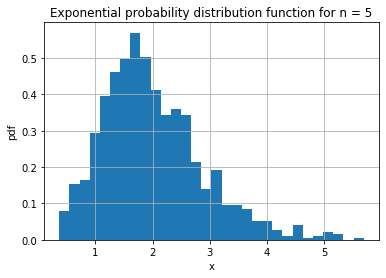

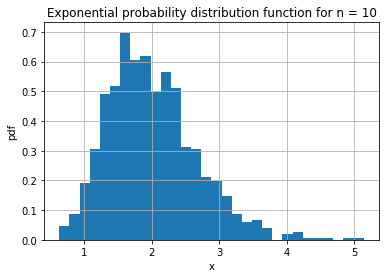

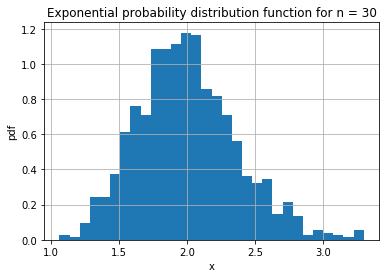

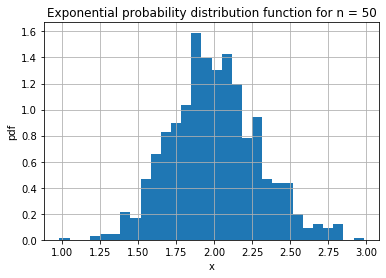

E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


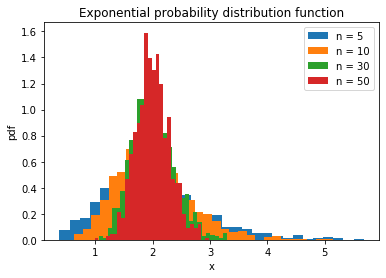

In [75]:
for i in range(len(sampleVolume)):
    plt.hist(exp_samples[i], bins=30, normed=True)
    plt.grid()
    plt.title('Exponential probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range(len(sampleVolume)):
    plt.hist(exp_samples[i], bins=30, normed=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.title('Exponential probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

Вычислим параметры нормальных распределений, которыми, согласно центральной предельной теореме, 
приближается распределение выборочных средних

In [76]:
distributionSampleMean = scale
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in range( len(sampleVolume) ):
    distributionSampleVariance[i] = scale**2 / sampleVolume[i]
    
print('Математическое ожидание: ' + str(distributionSampleMean))
for i in range( len(sampleVolume) ):
    print('Дисперсия для n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i]))

Математическое ожидание: 2
Дисперсия для n = 5: 0.8
Дисперсия для n = 10: 0.4
Дисперсия для n = 30: 0.13333333333333333
Дисперсия для n = 50: 0.08


Построим плотность соответствующего нормального распределения поверх каждой гистограммы, нарисованной ранее

E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


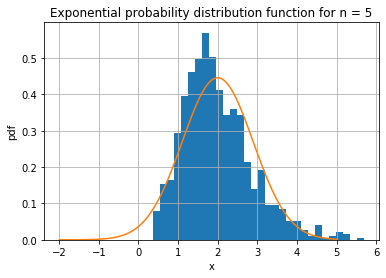

E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


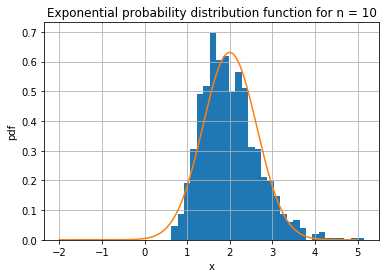

E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


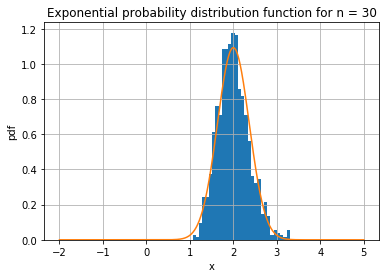

E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


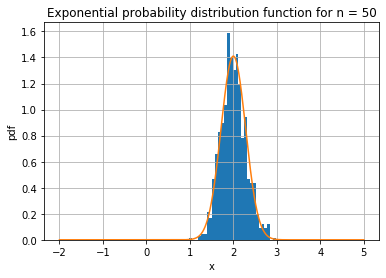

E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
E:\Users\usov_\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


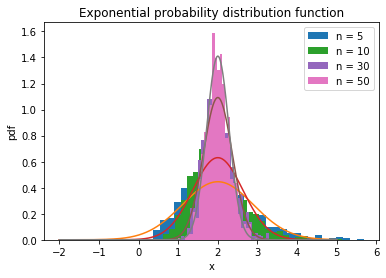

In [77]:
for i in range( len(sampleVolume) ):
    plt.hist(exp_samples[i], bins=30, normed=True)
    plt.grid()
    plt.title('Exponential probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-2, 5,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range( len(sampleVolume) ):
    plt.hist(exp_samples[i], bins=30, normed=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.title('Exponential probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-2, 5,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

# Вывод

С ростом n точность нормальной аппроксимации увеличивается.